In [2]:
#importar bibliotecas necessárias: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
#ler o arquivo e mostrar as primeiras 5 linhas para sabermos quais colunas existem nos dados: 
df = pd.read_csv("C:\\Users\\User\\Documents\\customer_data.csv")
df.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [4]:
#tamanho
df.shape

(1000, 8)

In [5]:
#analisar se existem dados vazios 
df.isnull().values.any()

False

In [6]:
#linhas duplicadas:
print("Duplicate rows found!" if df.duplicated().any() else "No duplicate rows found.")

No duplicate rows found.


In [7]:
df.describe()
#media,mediana,maximo,.. dos valores

,age,income,purchase_frequency,spending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.754000,59277.852000,0.554600,9613.296835
std,13.778582,23258.377128,0.284675,5484.707210
min,18.000000,20031.000000,0.100000,611.985000
25%,30.000000,38825.500000,0.300000,5020.425000
50%,42.000000,58972.000000,0.600000,9430.395000
75%,54.000000,79114.000000,0.800000,13645.507500
max,65.000000,99780.000000,1.000000,25546.500000


### Análise dos gastos x salários


Text(0, 0.5, 'Gastos em dólares')

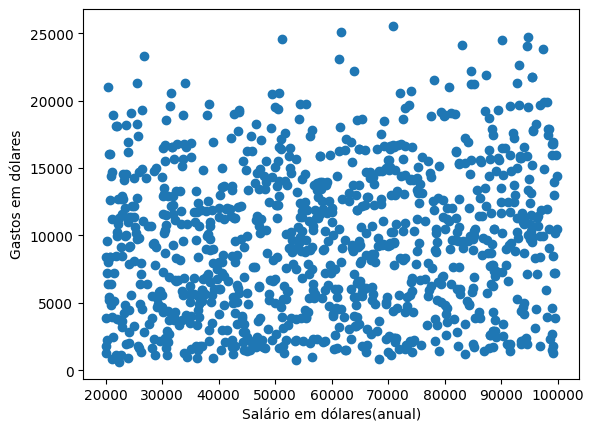

In [8]:
#gráfico de todos os salários e gastos:
plt.scatter(df["income"],df.spending)
plt.xlabel("Salário em dólares(anual)")
plt.ylabel("Gastos em dólares")

### Separando em intervalos de 10k, e depois visualisando as medianas dos gastos:

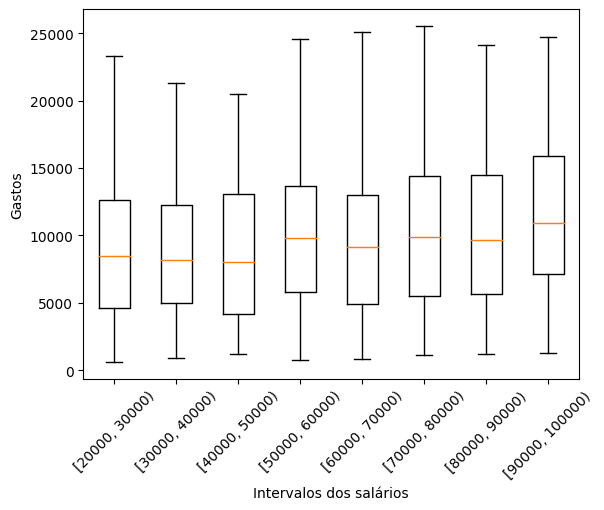

In [9]:

#este código foi feito com a ajuda do chat gpt!!


# Create the income intervals
df['intervalos'] = pd.cut(df['income'], bins=range(0, max(df['income']) + 10000, 10000), right=False)

# Create a list to hold the spending data for each income interval
spending_data = []

# Get the unique income intervals and sort them
unique_intervals = sorted(df['intervalos'].unique())

# Iterate over the sorted income intervals and extract the spending values
for interval in unique_intervals:
    spending_data.append(df[df['intervalos'] == interval]['spending'].values)

# Create a box plot
plt.boxplot(spending_data)

plt.xlabel('Intervalos dos salários')
plt.ylabel('Gastos')

plt.xticks(ticks=range(1, len(spending_data) + 1), labels=unique_intervals, rotation=45)  # Set the x-axis tick labels

plt.show()




-  Percebemos que as medianas são relativamente parecidas, porém com extremos em todos os intervalos 

-  O grupo com gastos os gastos mais constantes é o de 40k a 50k

### Análise dos gastos/salários médios por nível de educação:

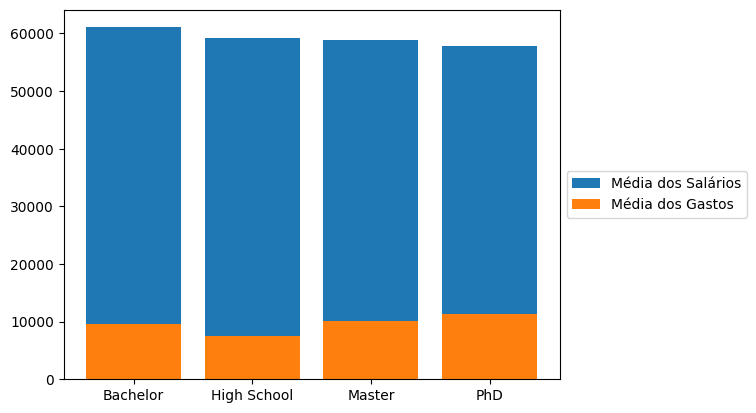

In [10]:
media_salarios_educacao = df.groupby(["education"])["income"].mean()
media_gastos_educacao = df.groupby(["education"])["spending"].mean()
plt.bar(media_salarios_educacao.index, media_salarios_educacao,label="Média dos Salários")
plt.bar(media_gastos_educacao.index, media_gastos_educacao, label="Média dos Gastos")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


- Percebemos uma pequena diferença nas médias dos salários em relação ao nível de educação, o que é um pouco estranho, mas pode acontecer com dados pequenos

### Gastos médios por idade

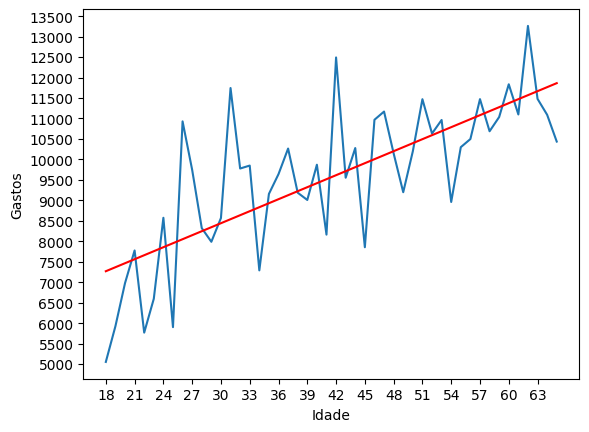

In [11]:
import scipy.stats as stats  #biblioteca para regressão linear
media_gastos_idade = df.groupby(["age"])["spending"].mean()
plt.plot(media_gastos_idade.index,media_gastos_idade)
plt.xlabel("Idade")
plt.ylabel("Gastos")
plt.xticks(np.arange(min(media_gastos_idade.index), max(media_gastos_idade.index)+1, 3))
plt.yticks(np.arange(5000, max(media_gastos_idade)+1000, 500))
slope, intercept, r_value, p_value, std_err = stats.linregress(media_gastos_idade.index, media_gastos_idade)
regression_line = intercept + slope * media_gastos_idade.index
plt.plot(media_gastos_idade.index, regression_line, color='red')

-  Percebemos uma correlação entre idade X gastos

### Gastos médios por gênero:

<BarContainer object of 2 artists>

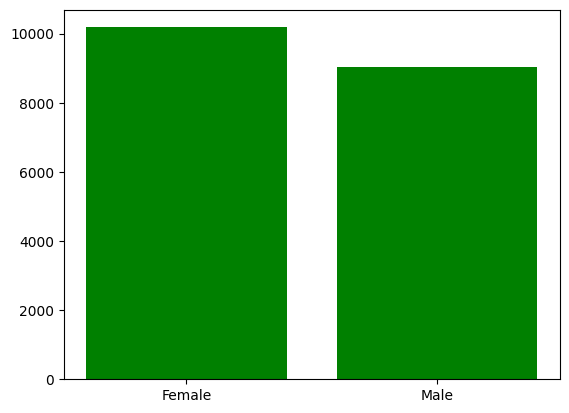

In [90]:
gastos_genero = df.groupby(["gender"])["spending"].mean()
plt.bar(gastos_genero.index,gastos_genero,color = "green")

### Países com maiores médias de salários e gastos: 

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Saint Helena'),
  Text(1, 0, 'Hungary'),
  Text(2, 0, 'Saint Lucia'),
  Text(3, 0, 'Falkland Islands (Malvinas)'),
  Text(4, 0, 'Thailand')])

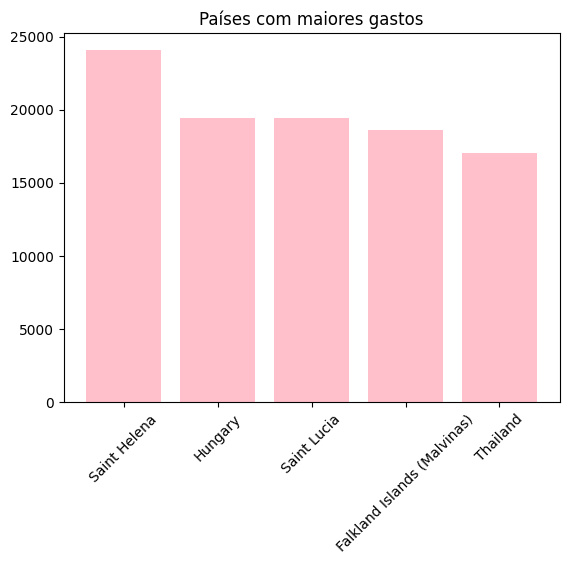

In [12]:
paises_maisgastos = df.groupby(["country"])["spending"].mean()
gastos_5 = paises_maisgastos.nlargest(5)
paises_maiorsalarios = df.groupby(["country"])["income"].mean()
salarios_5 = paises_maiorsalarios.nlargest(5)
plt.bar(gastos_5.index, gastos_5, color="pink")
plt.title("Países com maiores gastos")
plt.xticks(rotation=45)


Text(0.5, 1.0, 'Países com maiores salários')

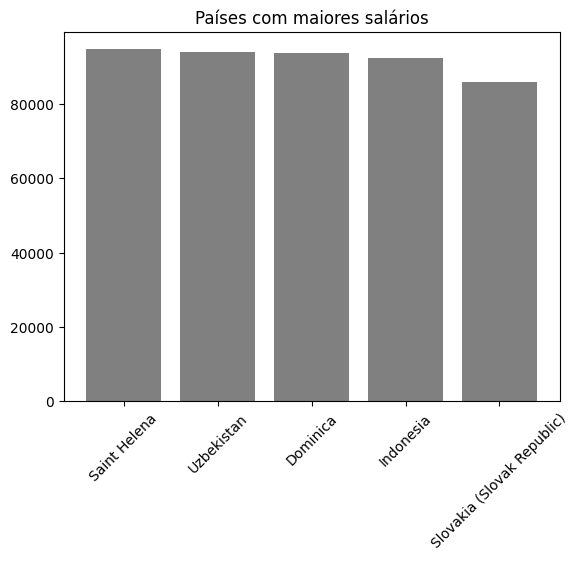

In [19]:
plt.bar(salarios_5.index, salarios_5, color="grey")
plt.xticks(rotation=45)
plt.title("Países com maiores salários")

### Conclusões

-  Maiores salários não necessariamente significam maiores gastos e vice versa, isso pode se dar por diversos fatores como custo de vida, quantidade de filhos, baixa educação financeira, etc.

-  Pessoas do gênero feminino gastam mais em relação as do gênero masculino em média

-  Pessoas mais velhas tendem a gastar mais

-  Nos dados analisados, educação parece ter pouca influência tanto em salários como em gastos